In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (7, 4.5)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import preprocessing

In [151]:
from sklearn.ensemble import RandomForestRegressor
#use regressor for numerical values

# use RF on every var as y, sum up importance across rows
# column is the Y value used
# seaborn hues
# orienth to make it horizontal

data = pd.read_csv("OutliersRemoved2.csv")
data = data.drop(data.columns[[0,1,2,3,4,5,6]],axis = 1)

# imputation by subbing with mean on copy of data
data = data.dropna(thresh = 5000, axis = 'columns')
data = data.dropna(how = 'any', thresh = 40)

data1 = data.fillna(data.mean())

# shuffle 
data1 = shuffle(data1, random_state = 0)


In [152]:
def importance_charter(y_vals):
    rf2 = RandomForestRegressor(n_estimators=500)
    reg_imp = pd.DataFrame(data =0,index = data1.columns,columns = data1.columns)
    X3 = data1.drop(y_vals, axis =1)

    for y in list(y_vals):
        Y3 = data1[y]
        X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size=0.15, random_state = 0)    
        rf2.fit(X3_train, Y3_train)
        run = rf2.feature_importances_ 

        d = dict(zip(X3.columns,run))
        for x in X3.columns:
            reg_imp.loc[x,y] = d[x]

    reg_imp_sum = pd.DataFrame(data = reg_imp.sum(axis=1),index = data1.columns,columns = ["Importance"])

    # remove all 0's
    reg_imp_sum = reg_imp_sum.loc[(reg_imp_sum!=0).any(axis=1)]

    # top 10 regressors
    regressors = reg_imp_sum.sort_values( [ 'Importance' ] , ascending = True )
    top10 = regressors[:10]
    print("This is the RF sum importance chart for regressing on")
    print(y_vals)
    top10.plot(kind= "barh")
    top10.columns = ["RF Importance"]
    return top10

In [153]:
def gradboost_importance(y_vals):
    rf2 = GradientBoostingRegressor(n_estimators=500)
    reg_imp = pd.DataFrame(data =0,index = data1.columns,columns = data1.columns)
    X3 = data1.drop(y_vals, axis =1)

    for y in list(y_vals):
        Y3 = data1[y]
        X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size=0.15, random_state = 0)    
        rf2.fit(X3_train, Y3_train)
        run = rf2.feature_importances_ 

        d = dict(zip(X3.columns,run))
        for x in X3.columns:
            reg_imp.loc[x,y] = d[x]

    reg_imp_sum = pd.DataFrame(data = reg_imp.sum(axis=1),index = data1.columns,columns = ["Importance"])

    # remove all 0's
    reg_imp_sum = reg_imp_sum.loc[(reg_imp_sum!=0).any(axis=1)]

    # top 10 regressors
    regressors = reg_imp_sum.sort_values( [ 'Importance' ] , ascending = True )
    top10 = regressors[:10]
    print("This is the XGB sum importance chart for regressing on")
    print(y_vals)
    top10.plot(kind= "barh")
    top10.columns = ["XGB Importance"]
    return top10


In [154]:
def normalizer(col):
    return col/sum(col)

This is the RF sum importance chart for regressing on
['9. Loss and leakage volume (10,000 cubic metres)', '10. Loss and leakage rate (%)']


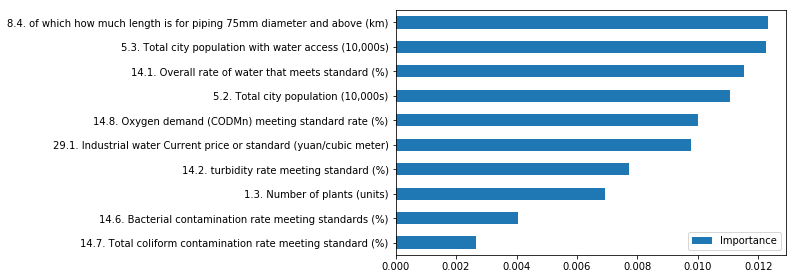

In [155]:
leakage_rate = ["9. Loss and leakage volume (10,000 cubic metres)",
                "10. Loss and leakage rate (%)"]
leakRF = importance_charter(leakage_rate)

This is the XGB sum importance chart for regressing on
['9. Loss and leakage volume (10,000 cubic metres)', '10. Loss and leakage rate (%)']


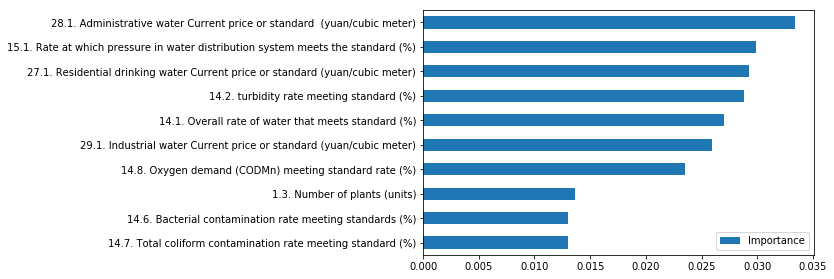

In [156]:
# perform xgboost
leakboost = gradboost_importance(leakage_rate)

side by side comparison of common RF and XGB importance rankings


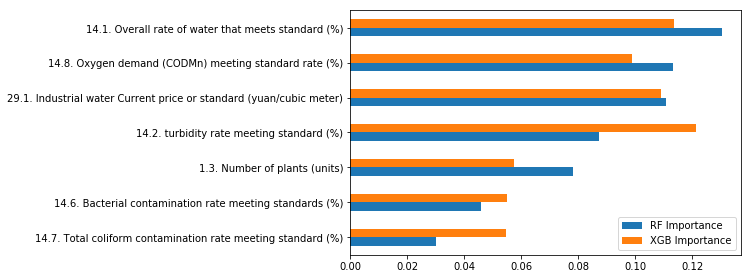

In [157]:
# create combined chart for leakage rate
# create double horizontal bar plot

print("side by side comparison of common RF and XGB importance rankings")

# join tables to collect common features, then normalize

leakRF_list = leakRF.iloc[:,0].values.astype(float)
leakRF["RF Importance"] = normalizer(leakRF_list)
             
# join tables to collect common features, then normalize

leakboost_list = leakboost.iloc[:,0].values.astype(float)
leakboost["XGB Importance"] = normalizer(leakboost_list)

leak_combined = pd.concat([leakRF,leakboost],axis = 1,join="inner")
leak_combined.plot(kind = "barh")

This is the RF sum importance chart for regressing on
['14.1. Overall rate of water that meets standard (%)', '14.2. turbidity rate meeting standard (%)', '14.6. Bacterial contamination rate meeting standards (%)', '14.7. Total coliform contamination rate meeting standard (%)', '14.8. Oxygen demand (CODMn) meeting standard rate (%)', '15.1. Rate at which pressure in water distribution system meets the standard (%)']


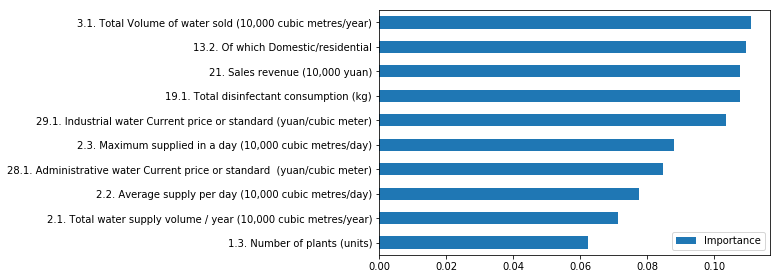

In [158]:
water_quality = ["14.1. Overall rate of water that meets standard (%)",
                 "14.2. turbidity rate meeting standard (%)",
                "14.6. Bacterial contamination rate meeting standards (%)",
                 "14.7. Total coliform contamination rate meeting standard (%)",
                 "14.8. Oxygen demand (CODMn) meeting standard rate (%)",
                 "15.1. Rate at which pressure in water distribution system meets the standard (%)"]
waterRF = importance_charter(water_quality)

This is the XGB sum importance chart for regressing on
['14.1. Overall rate of water that meets standard (%)', '14.2. turbidity rate meeting standard (%)', '14.6. Bacterial contamination rate meeting standards (%)', '14.7. Total coliform contamination rate meeting standard (%)', '14.8. Oxygen demand (CODMn) meeting standard rate (%)', '15.1. Rate at which pressure in water distribution system meets the standard (%)']


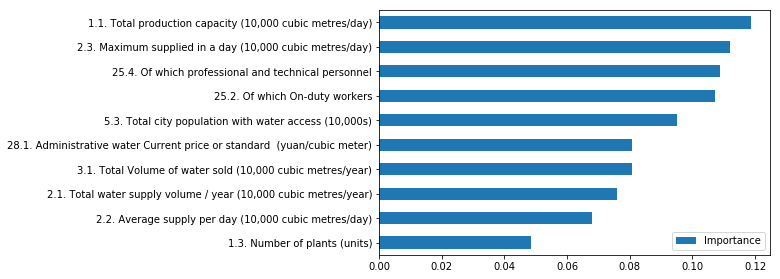

In [159]:
# perform xgboost
waterboost = gradboost_importance(water_quality)

side by side comparison of common RF and XGB importance rankings


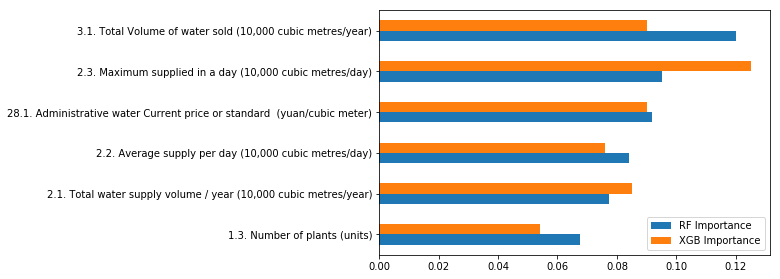

In [160]:
# create combined chart for leakage rate
# create double horizontal bar plot

print("side by side comparison of common RF and XGB importance rankings")

# join tables to collect common features, then normalize

waterRF_list = waterRF.iloc[:,0].values.astype(float)
waterRF["RF Importance"] = normalizer(waterRF_list)
             
# join tables to collect common features, then normalize

waterboost_list = waterboost.iloc[:,0].values.astype(float)
waterboost["XGB Importance"] = normalizer(waterboost_list)

water_combined = pd.concat([waterRF,waterboost],axis = 1,join="inner")
water_combined.plot(kind = "barh")

This is the RF sum importance chart for regressing on
['5.2. Total city population (10,000s)', '5.3. Total city population with water access (10,000s)']


,RF Importance
14.7. Total coliform contamination rate meeting standard (%),0.000425
14.6. Bacterial contamination rate meeting standards (%),0.001237
14.8. Oxygen demand (CODMn) meeting standard rate (%),0.002478
15.2. Average pressure in water distribution system (Mpa),0.004233
27.1. Residential drinking water Current price or standard (yuan/cubic meter),0.004385
"19.2. Disinfectant consumption per unit water (kg / 1,000 cubic meters)",0.004641
14.1. Overall rate of water that meets standard (%),0.004834
28.1. Administrative water Current price or standard (yuan/cubic meter),0.005612
1.3. Number of plants (units),0.005665
29.1. Industrial water Current price or standard (yuan/cubic meter),0.006036


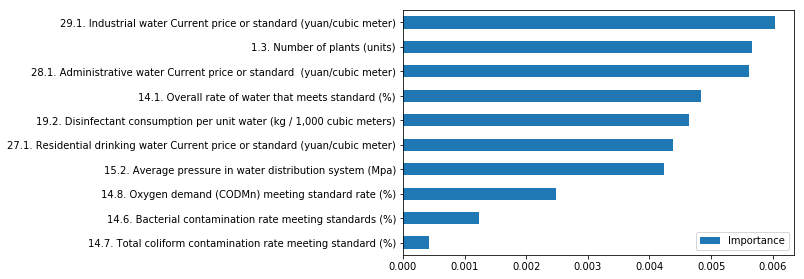

In [161]:
population = ["5.2. Total city population (10,000s)",
              "5.3. Total city population with water access (10,000s)"]
importance_charter(population)

This is the RF sum importance chart for regressing on
['6.1. Average water use for all purposes (L/person*day)', '6.2. Average water use for residential/household/living purposes (L/person*day)']


,RF Importance
14.7. Total coliform contamination rate meeting standard (%),0.004333
14.6. Bacterial contamination rate meeting standards (%),0.004460
14.8. Oxygen demand (CODMn) meeting standard rate (%),0.004684
1.3. Number of plants (units),0.009741
14.2. turbidity rate meeting standard (%),0.010054
14.1. Overall rate of water that meets standard (%),0.011684
27.1. Residential drinking water Current price or standard (yuan/cubic meter),0.013016
15.1. Rate at which pressure in water distribution system meets the standard (%),0.014046
8.3. Of which are supplying water (km),0.014203
8.1. Total pipe length (km),0.015271


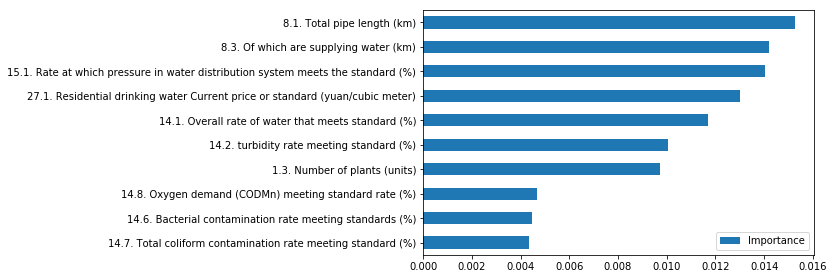

In [162]:
water_use = ["6.1. Average water use for all purposes (L/person*day)",
             "6.2. Average water use for residential/household/living purposes (L/person*day)"]
importance_charter(water_use)

This is the RF sum importance chart for regressing on
['19.1. Total disinfectant consumption (kg)', '19.2. Disinfectant consumption per unit water (kg / 1,000 cubic meters)']


,RF Importance
15.1. Rate at which pressure in water distribution system meets the standard (%),0.002293
14.6. Bacterial contamination rate meeting standards (%),0.003380
14.8. Oxygen demand (CODMn) meeting standard rate (%),0.003595
25.2. Of which On-duty workers,0.004605
8.4. of which how much length is for piping 75mm diameter and above (km),0.005594
8.3. Of which are supplying water (km),0.005881
"3.5. Of which Commercial (10,000 cubic metres/year)",0.006073
"3.2. Of which Domestic/residential water (10,000 cubic metres/year)",0.006447
8.1. Total pipe length (km),0.006525
"3.4. Of which Industrial (10,000 cubic metres/year)",0.006782


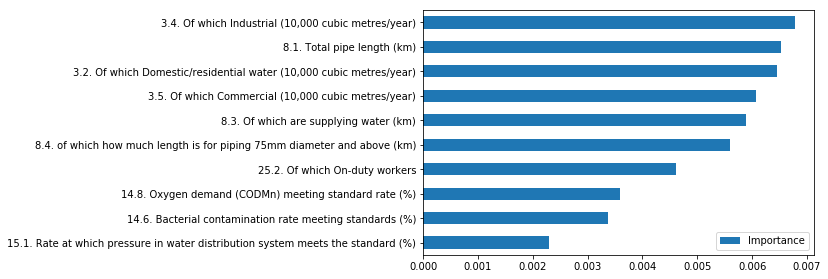

In [163]:
disinfectant_consumption = ["19.1. Total disinfectant consumption (kg)",
"19.2. Disinfectant consumption per unit water (kg / 1,000 cubic meters)"]
importance_charter(disinfectant_consumption)